<img src="https://www.jamboreeindia.com/know-how/wp-content/uploads/2017/01/jamboree.png" alt="Sample Image" width="60%" height="300;">



# **Machine Learing - Linear Regression Project**

-Trained by Aditya Das

### About Jamboree

Jamboree is India’s leading institute for study abroad test prep and admission counselling. With the highest scores for GMAT and GRE in the industry and admission offers from the best universities worldwide, Jamboree has helped thousands of students get into their dream universities.
It provides rigorous test prep for GRE, GMAT, IELTS, & TOEFL; in-depth application guidance; and comprehensive interview training that is valued most by top universities around the world.
Jamboree's unique problem-solving methods ensure maximum scores with minimum effort.

### Problem Statement : Predicting Admission into IVY League Colleges

To support students, Jamboree has recently introduced a new feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

Jamboree need assistance in understanding the crucial
factors impacting graduate admissions and their interrelationships. Primary objective is to analyze the given dataset and derive valuable insights from it. We need to provide predictive insights to determine an individual's likelihood of admission based on the available features.

### Key Questions
What are the critical factors impacting graduate admissions?<br>
How do these factors interact with each other?<br>
Can we build a predictive model to estimate an applicant’s chances of admission?

### Deliverables

Exploratory Data Analysis (EDA) to identify patterns and trends.<br>
Feature engineering to enhance predictive power.<br>
Building a predictive model (Logistic regression).<br>
Evaluation metrics to assess model performance.<br>
Insights and recommendations for prospective applicants.

### Column Profiling
● Serial No.: This column represents the unique row identifier for each applicant in the
dataset.<br>
● GRE Scores: This column contains the GRE (Graduate Record Examination) scores of
the applicants, which are measured on a scale of 0 to 340.<br>
● TOEFL Scores: This column includes the TOEFL (Test of English as a Foreign Language)
scores of the applicants, which are measured on a scale of 0 to 120.<br>
● University Rating: This column indicates the rating or reputation of the university that
the applicants are associated with.<br>
(The rating is based on a scale of 0 to 5, with 5 representing the highest rating)<br>
● SOP: This column represents the strength of the applicant's statement of purpose,
rated on a scale of 0 to 5, with 5 indicating a strong and compelling SOP.<br>
● LOR: This column represents the strength of the applicant's letter of recommendation,
rated on a scale of 0 to 5, with 5 indicating a strong and compelling LOR.<br>
● CGPA: This column contains the undergraduate Grade Point Average (GPA) of the
applicants, which is measured on a scale of 0 to 10.<br>
● Research: This column indicates whether the applicant has research experience (1) or
not (0).<br>
● Chance of Admit: This column represents the estimated probability or chance of
admission for each applicant, ranging from 0 to 1.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
pip install scikit-learn

In [ ]:
pip install category_encoders

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from category_encoders import TargetEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import RidgeCV, LassoCV

import statsmodels.api as sm

In [ ]:
!gdown 1UCnSk_NN02jlzj0bbSZ_j-gdGUDDJxy4

Downloading...
From: https://drive.google.com/uc?id=1UCnSk_NN02jlzj0bbSZ_j-gdGUDDJxy4
To: /content/Jamboree.csv
100% 16.2k/16.2k [00:00<00:00, 27.3MB/s]


In [ ]:
df=pd.read_csv("Jamboree.csv")

In [ ]:
df_backup=df

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.shape

(500, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [ ]:
df.drop(columns='Serial No.', axis=1, inplace=True)

In [ ]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df[['University Rating', 'SOP', 'LOR ', 'Research']]=df[['University Rating', 'SOP', 'LOR ', 'Research']].astype('category')

In [ ]:
df.rename(columns={'LOR ':'LOR'}, inplace=True)

In [ ]:
df.rename(columns={'Chance of Admit ':'Chance of Admit'}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   GRE Score          500 non-null    int64   
 1   TOEFL Score        500 non-null    int64   
 2   University Rating  500 non-null    category
 3   SOP                500 non-null    category
 4   LOR                500 non-null    category
 5   CGPA               500 non-null    float64 
 6   Research           500 non-null    category
 7   Chance of Admit    500 non-null    float64 
dtypes: category(4), float64(2), int64(2)
memory usage: 18.8 KB


In [ ]:
df.nunique()

,0
GRE Score,49
TOEFL Score,29
University Rating,5
SOP,9
LOR,9
CGPA,184
Research,2
Chance of Admit,61


In [ ]:
df.describe()

,GRE Score,TOEFL Score,CGPA,Chance of Admit
count,500.000000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,8.576440,0.72174
std,11.295148,6.081868,0.604813,0.14114
min,290.000000,92.000000,6.800000,0.34000
25%,308.000000,103.000000,8.127500,0.63000
50%,317.000000,107.000000,8.560000,0.72000
75%,325.000000,112.000000,9.040000,0.82000
max,340.000000,120.000000,9.920000,0.97000


In [ ]:
df.describe(include='category')

,University Rating,SOP,LOR,Research
count,500,500.0,500.0,500
unique,5,9.0,9.0,2
top,3,4.0,3.0,1
freq,162,89.0,99.0,280


In [ ]:
df[df.duplicated()]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


Insights:

- There are 500 rows and 9 columns in the dataset.
- Serial No. column is unique row identifier kind of column which is not required in our model building.
- No duplicate values are present in the dataset.
- No missing values are present in the dataset too.
- `GRE Score` is between 290 to 340.
- `TOEFL Score` is between 92 to 120.
- `University Rankings`, `SOP` and `LOR` have values till 5. 5 is the highest value/rating.
- `CGPA` is from 6.8 to 9.92.
- `Research` column shows 56% applicants has research experience.
- More than 75% applicants have more than 0.63 probability of getting admission.

## Checking Outliers

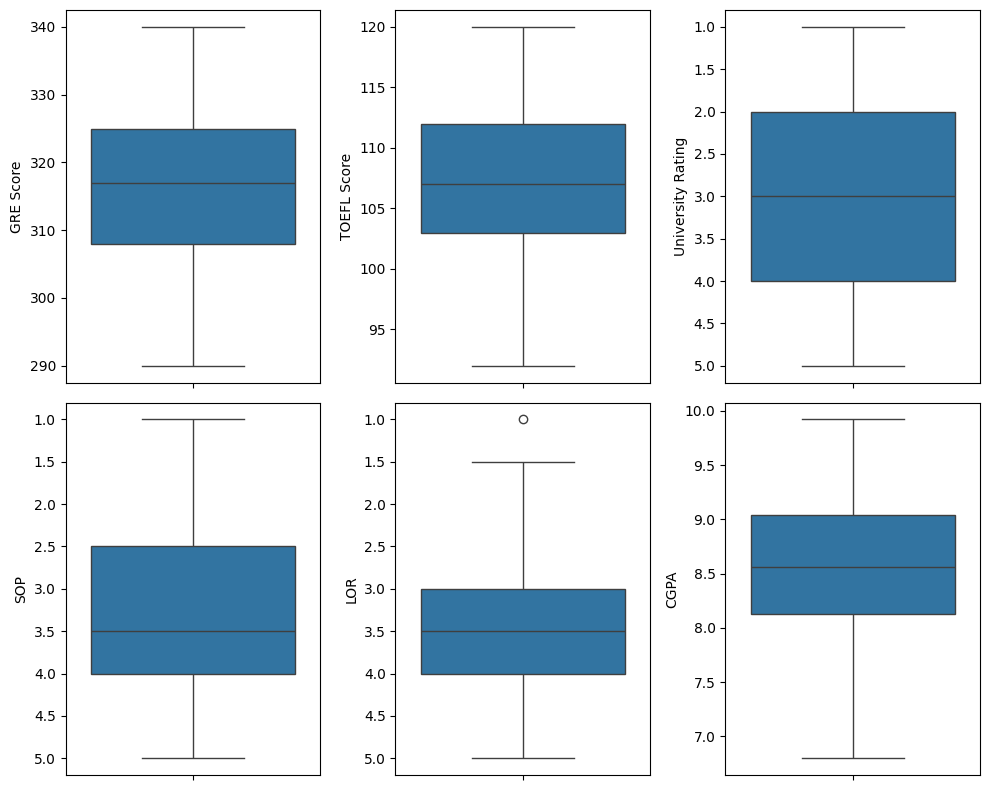

In [ ]:
column=df.columns[:6]
i=1
plt.figure(figsize=(10,8))
for col in column:
  plt.subplot(2,3,i)
  sns.boxplot(data=df, y=col)
  i+=1
plt.tight_layout()
plt.show()

### Outlier Treatment

There is no outliers except in LOR, but that too is just one data point.
We can ignore that as the impact may be less.

Note that the features, SOP, LOR and University Rating were converted to category type.
However, since we had numerical values, we can also check outliers for the same.

## Exploratory Data Analysis

###Univariate Analysis

#### Category variables

University Rating

In [ ]:
df_rating_chance=df.groupby('University Rating')['Chance of Admit'].mean().sort_values(ascending=False)

In [ ]:
df_rating_chance

,Chance of Admit
University Rating,
5,0.888082
4,0.801619
3,0.702901
2,0.626111
1,0.562059


In [ ]:
df_university_count=df['University Rating'].value_counts().sort_values(ascending=False)

In [ ]:
df_university_count

,count
University Rating,
3,162
2,126
4,105
5,73
1,34


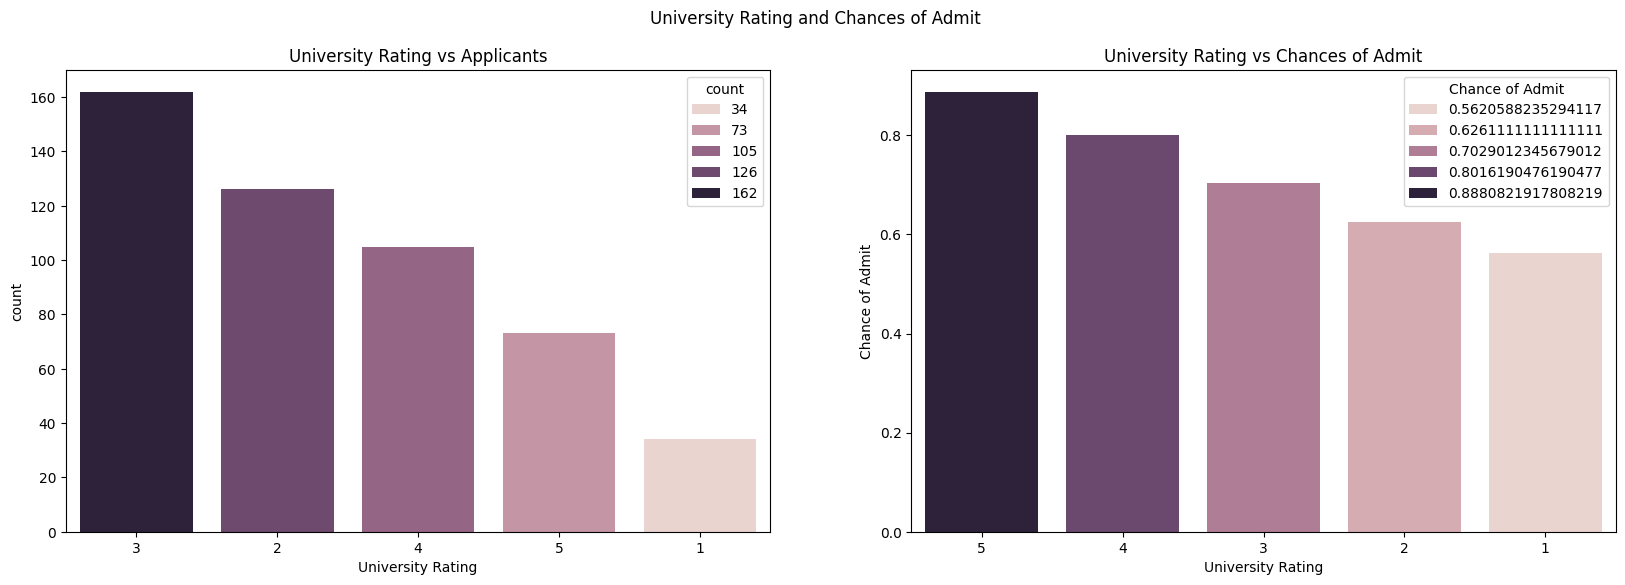

In [ ]:
plt.figure(figsize=(20, 6))
plt.suptitle('University Rating and Chances of Admit')

plt.subplot(1,2,1)
plt.title('University Rating vs Applicants')
sns.barplot(x=df_university_count.index, y=df_university_count, hue=df_university_count, order=df_university_count.index)

plt.subplot(1,2,2)
plt.title('University Rating vs Chances of Admit')
sns.barplot(x=df_rating_chance.index, y=df_rating_chance, hue=df_rating_chance, order=df_rating_chance.index)
plt.show()

SOP

In [ ]:
df_SOP_count=df['SOP'].value_counts().sort_values(ascending=False)
df_SOP_count

,count
SOP,
4.0,89
3.5,88
3.0,80
2.5,64
4.5,63
2.0,43
5.0,42
1.5,25
1.0,6


In [ ]:
df_SOP_chance=df.groupby('SOP')['Chance of Admit'].mean().sort_values(ascending=False)
df_SOP_chance

,Chance of Admit
SOP,
5.0,0.885000
4.5,0.850000
4.0,0.782809
3.5,0.712045
3.0,0.678500
2.5,0.645312
2.0,0.589535
1.5,0.546400
1.0,0.538333


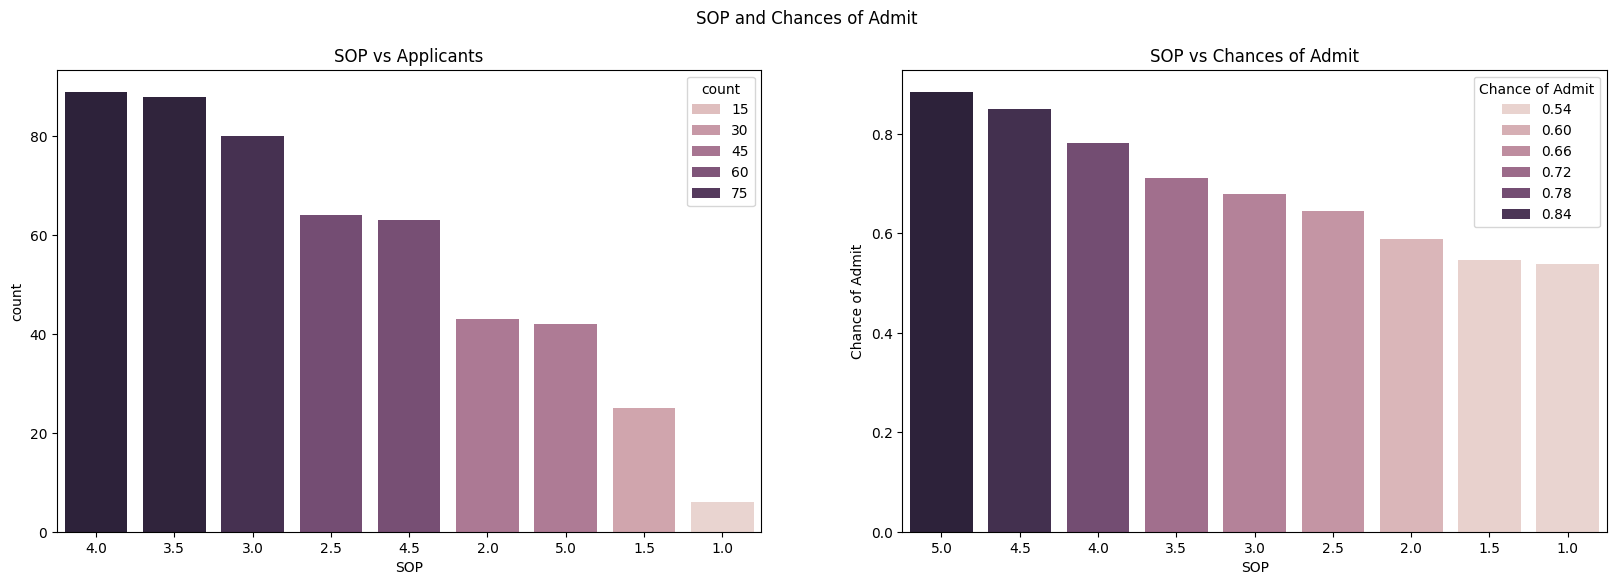

In [ ]:
plt.figure(figsize=(20, 6))
plt.suptitle('SOP and Chances of Admit')

plt.subplot(1,2,1)
plt.title('SOP vs Applicants')
sns.barplot(x=df_SOP_count.index, y=df_SOP_count, hue=df_SOP_count, order=df_SOP_count.index)

plt.subplot(1,2,2)
plt.title('SOP vs Chances of Admit')
sns.barplot(x=df_SOP_chance.index, y=df_SOP_chance, hue=df_SOP_chance, order=df_SOP_chance.index)
plt.show()

LQR

In [ ]:
df_LOR_count=df['LOR'].value_counts().sort_values(ascending=False)
df_LOR_count

,count
LOR,
3.0,99
4.0,94
3.5,86
4.5,63
2.5,50
5.0,50
2.0,46
1.5,11
1.0,1


In [ ]:
df_LOR_chance=df.groupby('LOR')['Chance of Admit'].mean().sort_values(ascending=False)
df_LOR_chance

,Chance of Admit
LOR,
5.0,0.872600
4.5,0.831905
4.0,0.764149
3.5,0.723023
3.0,0.668485
2.5,0.640600
2.0,0.568261
1.5,0.550000
1.0,0.420000


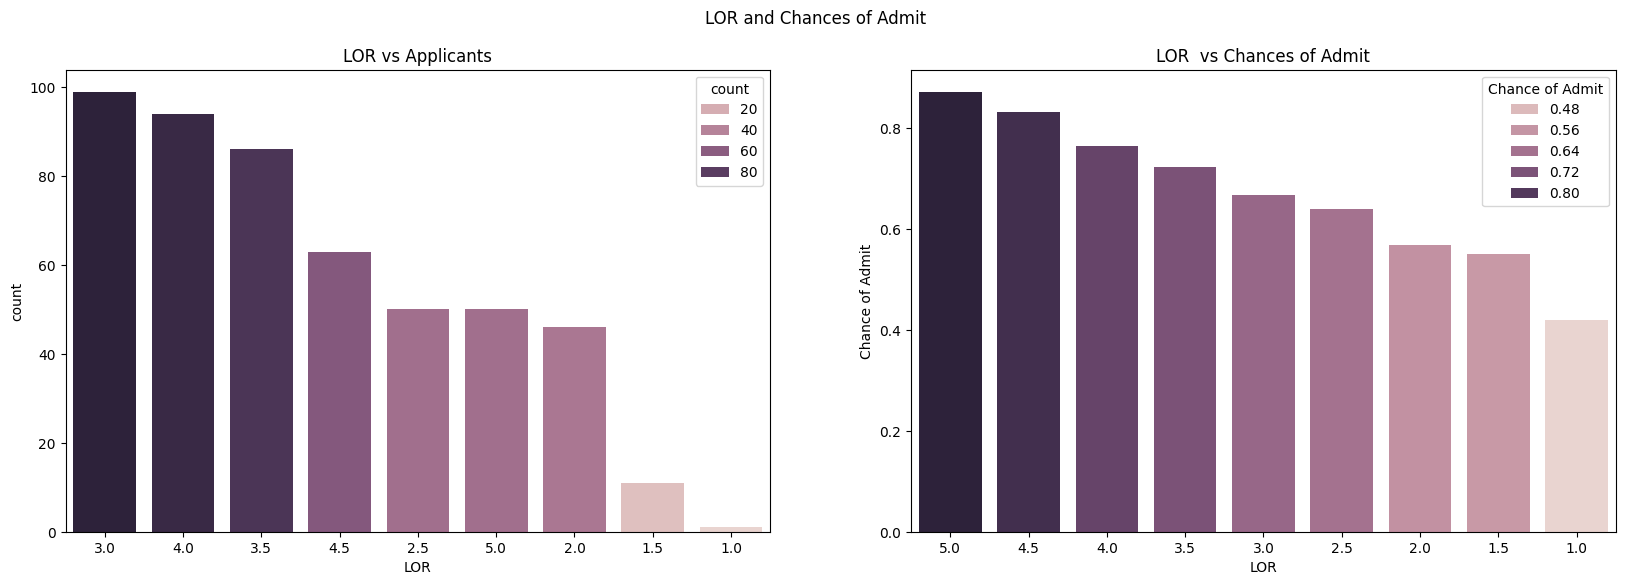

In [ ]:
plt.figure(figsize=(20, 6))
plt.suptitle('LOR and Chances of Admit')

plt.subplot(1,2,1)
plt.title('LOR vs Applicants')
sns.barplot(x=df_LOR_count.index, y=df_LOR_count, hue=df_LOR_count, order=df_LOR_count.index)

plt.subplot(1,2,2)
plt.title('LOR  vs Chances of Admit')
sns.barplot(x=df_LOR_chance.index, y=df_LOR_chance, hue=df_LOR_chance, order=df_LOR_chance.index)
plt.show()

Research

In [ ]:
df_Research_count=df['Research'].value_counts().sort_values(ascending=False)
df_Research_count

,count
Research,
1,280
0,220


In [ ]:
df_Research_chance=df.groupby('LOR')['Chance of Admit'].mean().sort_values(ascending=False)
df_Research_chance

,Chance of Admit
LOR,
5.0,0.872600
4.5,0.831905
4.0,0.764149
3.5,0.723023
3.0,0.668485
2.5,0.640600
2.0,0.568261
1.5,0.550000
1.0,0.420000


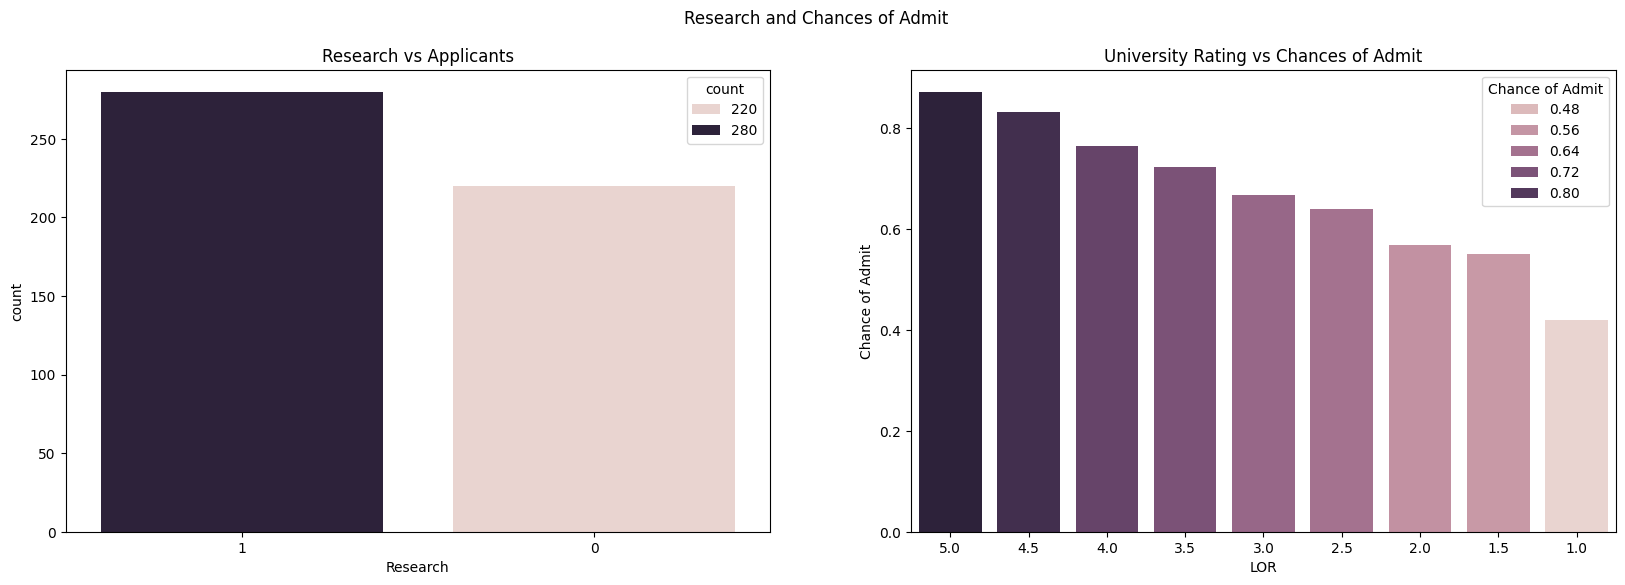

In [ ]:
plt.figure(figsize=(20, 6))
plt.suptitle('Research and Chances of Admit')

plt.subplot(1,2,1)
plt.title('Research vs Applicants')
sns.barplot(x=df_Research_count.index, y=df_Research_count, hue=df_Research_count, order=df_Research_count.index)

plt.subplot(1,2,2)
plt.title('University Rating vs Chances of Admit')
sns.barplot(x=df_Research_chance.index, y=df_Research_chance, hue=df_Research_chance, order=df_Research_chance.index)
plt.show()

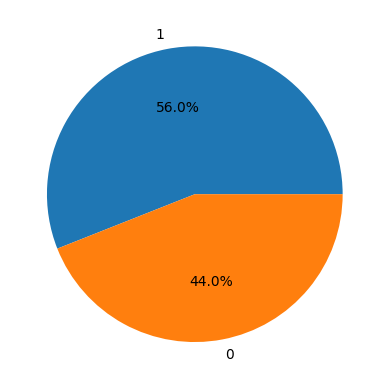

In [ ]:
plt.pie(df_Research_count, labels=df_Research_count.index, autopct='%1.1f%%')
plt.show()

####Numerical Variables

In [ ]:
numerical_col=df.select_dtypes(include='number')
numerical_col

,GRE Score,TOEFL Score,CGPA,Chance of Admit
0,337,118,9.65,0.92
1,324,107,8.87,0.76
2,316,104,8.00,0.72
3,322,110,8.67,0.80
4,314,103,8.21,0.65
...,...,...,...,...
495,332,108,9.02,0.87
496,337,117,9.87,0.96
497,330,120,9.56,0.93
498,312,103,8.43,0.73


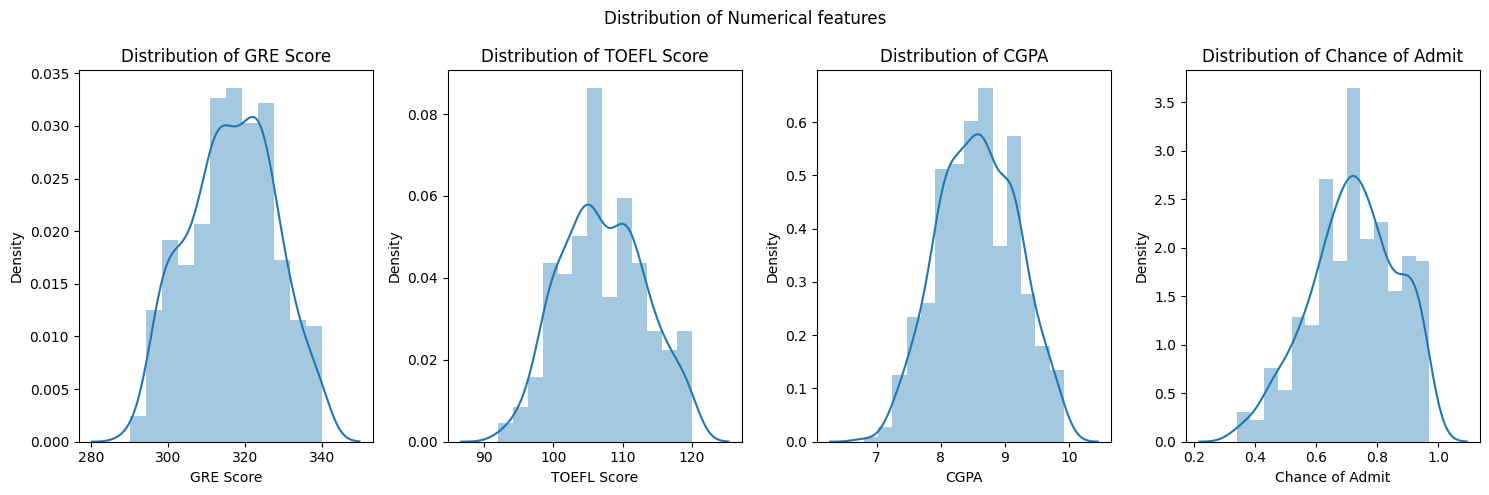

In [ ]:
plt.figure(figsize=(15, 5))
i=1
plt.suptitle("Distribution of Numerical features")
for col in numerical_col:
  plt.subplot(1,4, i)
  plt.title(f'Distribution of {col}')
  sns.distplot(df[col])
  i+=1
plt.tight_layout()
plt.show()

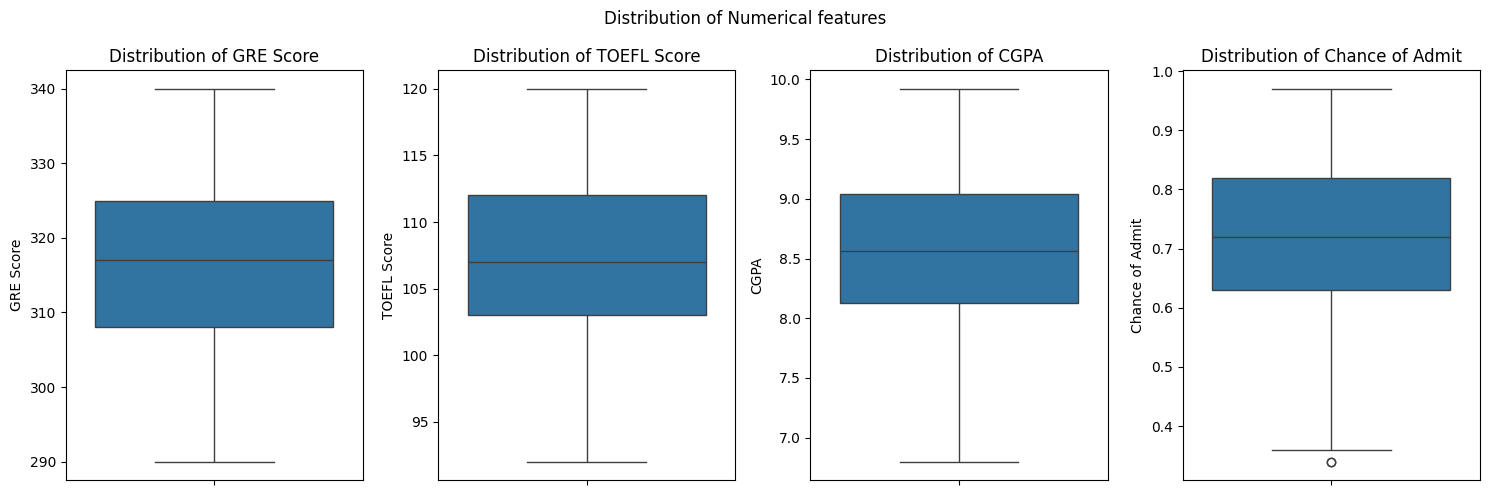

In [ ]:
plt.figure(figsize=(15, 5))
i=1
plt.suptitle("Distribution of Numerical features")
for col in numerical_col:
  plt.subplot(1,4, i)
  plt.title(f'Distribution of {col}')
  sns.boxplot(df[col])
  i+=1
plt.tight_layout()
plt.show()


Insights:

- It is observed that the GRE score for most students is between 310 to 330.
- TOEFL score for most is between 100 to 110.
- CGPA is mostly 8 to 9 in students data.
- Chance of admit is left skewed means some students have very less chance though more are having high chance of getting admissions in prestigious colleges.
- Majority of the applicants are assosciated with universities having ranking 2 and 3. Most of the applicants are from Universities which have a rating of 3.
- SOP of our students is also on positive side mostly greater than 2.
- LOR is above 3 for most of students.
- 56% students have research experience.

###Bivariate Analysis

<Axes: >

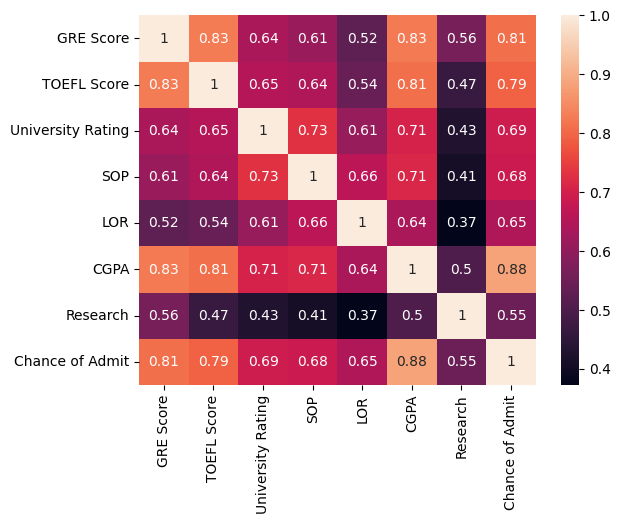

In [ ]:
sns.heatmap(df.corr(), annot=True)

###Multivariate Analysis

In [ ]:
category_cols=df.select_dtypes(include='category')
category_cols

,University Rating,SOP,LOR,Research
0,4,4.5,4.5,1
1,4,4.0,4.5,1
2,3,3.0,3.5,1
3,3,3.5,2.5,1
4,2,2.0,3.0,0
...,...,...,...,...
495,5,4.5,4.0,1
496,5,5.0,5.0,1
497,5,4.5,5.0,1
498,4,4.0,5.0,0


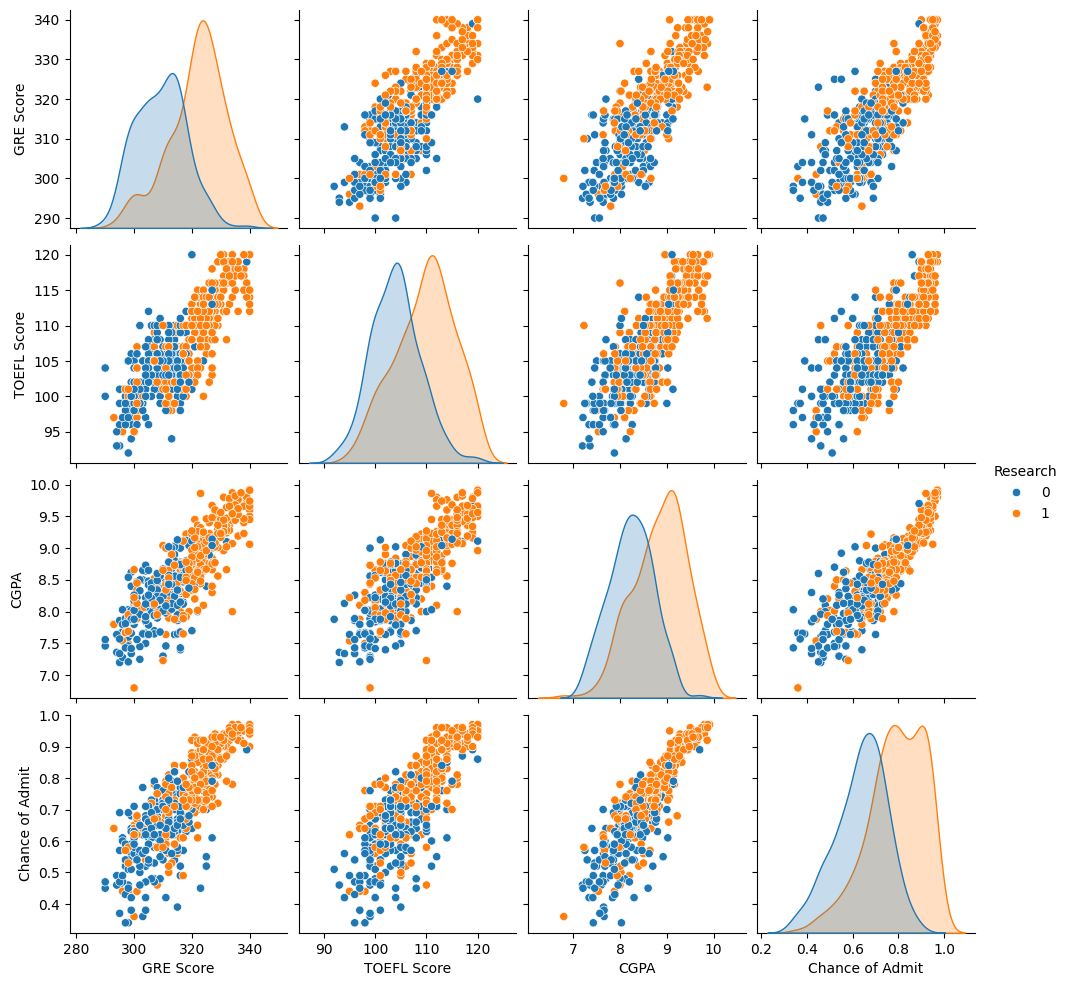

In [ ]:
sns.pairplot(df, hue='Research')

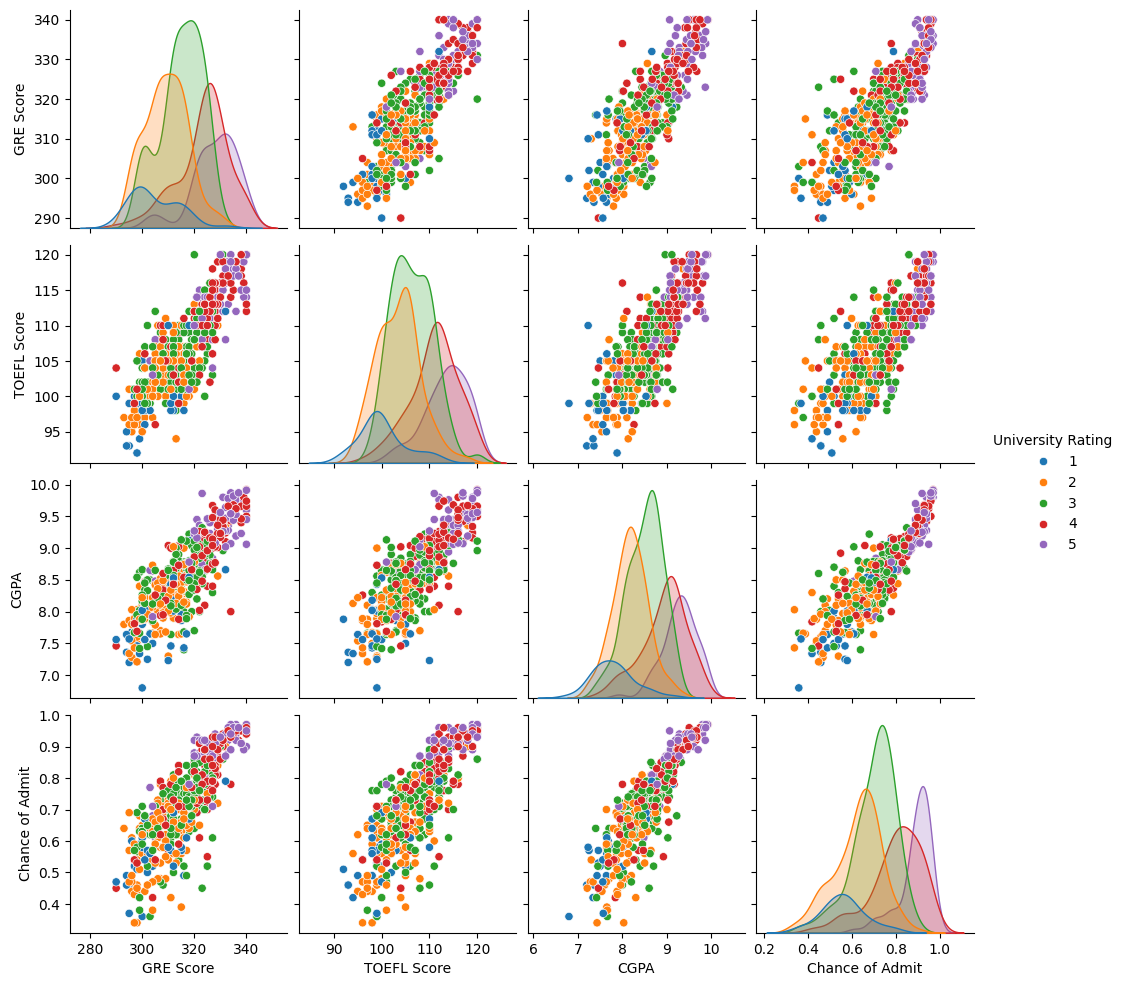

In [ ]:
sns.pairplot(df, hue='University Rating')

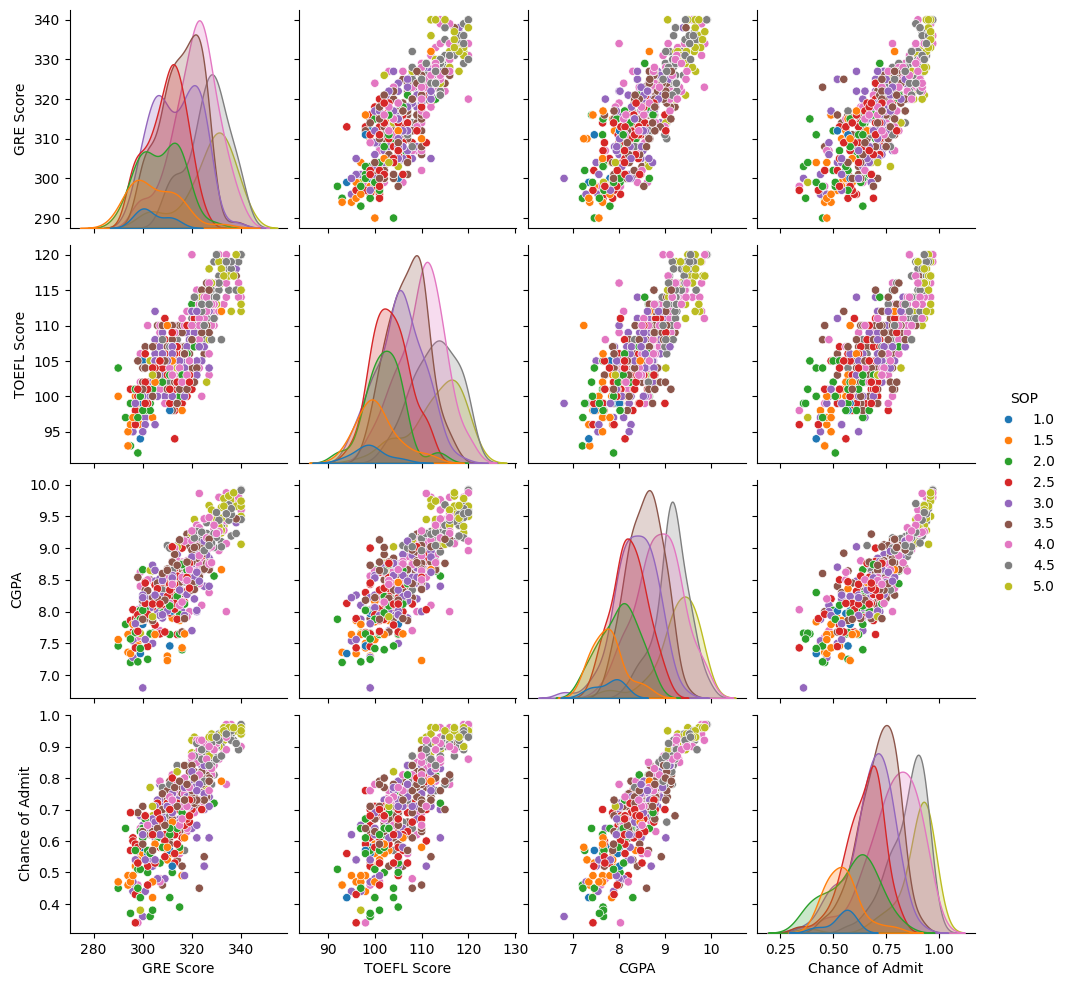

In [ ]:
sns.pairplot(df, hue='SOP')

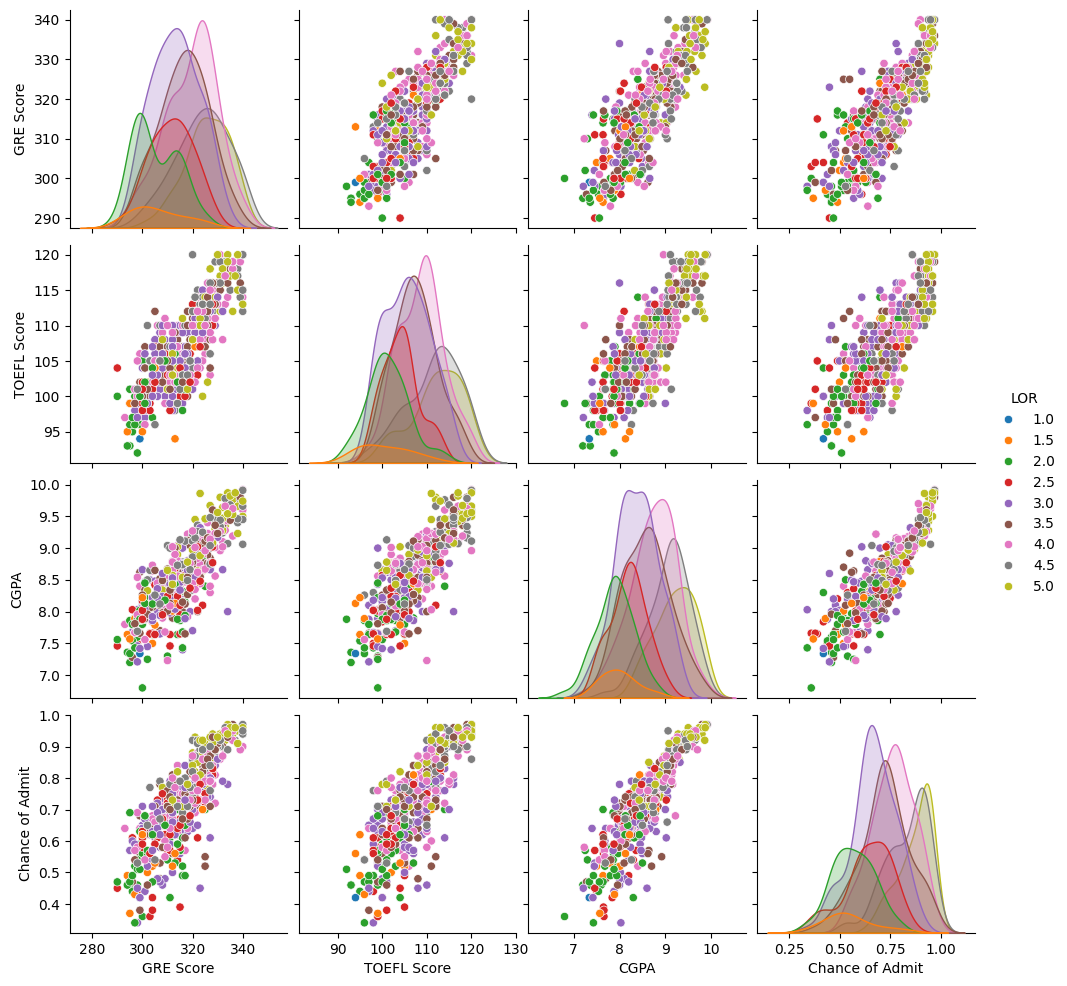

In [ ]:
sns.pairplot(df, hue='LOR')

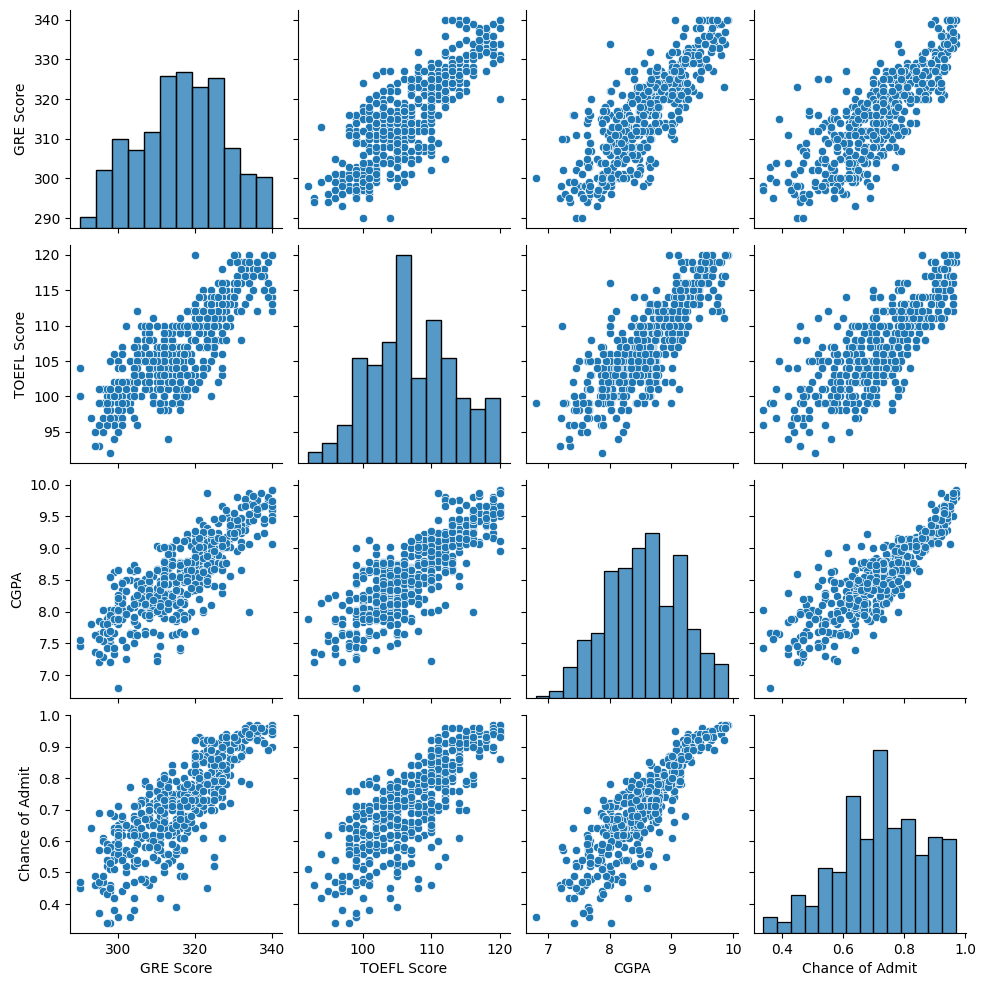

In [ ]:
sns.pairplot(df)

Insights:

- Features are positively correlated with each other and with Target too but no correlation is so high(>90) to remove these features and we are needed to check vif to check their multicollinearilty later.
- Students having high CGPA are having high GRE score, TOEFL score,SOP, LOR etc.
- GRE score is high when student did some research.
- With multivariate analysis we can see almost all features are positively correlated with each other and with target variable too.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   GRE Score          500 non-null    int64   
 1   TOEFL Score        500 non-null    int64   
 2   University Rating  500 non-null    category
 3   SOP                500 non-null    category
 4   LOR                500 non-null    category
 5   CGPA               500 non-null    float64 
 6   Research           500 non-null    category
 7   Chance of Admit    500 non-null    float64 
dtypes: category(4), float64(2), int64(2)
memory usage: 18.8 KB


## Implementing Linear Regression

In [ ]:
# Separating the dataset into features and label

X=df.drop(columns='Chance of Admit', axis=1)
y=df['Chance of Admit']

In [ ]:
# Splitting the data into test and train
Xtrain, Xtest, ytrain, ytest=train_test_split(X, y, test_size=0.2, random_state=40)
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((400, 7), (100, 7), (400,), (100,))

In [ ]:
# Finding the list of categorical features to be encoded
category_features=category_cols.columns
category_features

Index(['University Rating', 'SOP', 'LOR', 'Research'], dtype='object')

In [ ]:
#Encoding the categorical features
encoder=TargetEncoder()
Xtrain[category_features] = encoder.fit_transform(Xtrain[category_features], ytrain)
Xtest[category_features] = encoder.transform(Xtest[category_features])

In [ ]:
Xtrain.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
379,311,99,0.599791,0.647161,0.666020,8.43,0.787054
433,316,111,0.795766,0.781476,0.853178,8.54,0.631364
292,302,99,0.623907,0.684519,0.588588,7.97,0.631364
450,320,112,0.795766,0.685857,0.831156,8.86,0.787054
243,325,114,0.701936,0.709929,0.666020,9.04,0.787054


In [ ]:
# Scaling the data

scaler=StandardScaler()
scaler.fit(Xtrain)

Xtrain_index=Xtrain.index
Xtest_index=Xtest.index

Xtrain=pd.DataFrame(scaler.transform(Xtrain), columns=Xtrain.columns)
Xtest=pd.DataFrame(scaler.transform(Xtest), columns=Xtest.columns)

In [ ]:
Xtrain

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,-0.451660,-1.324150,-1.308254,-1.011499,-0.715792,-0.210524,0.886405
1,-0.014429,0.632119,0.792856,0.741100,1.629816,-0.030379,-1.128152
2,-1.238677,-1.324150,-1.049696,-0.524046,-1.686230,-0.963856,-1.128152
3,0.335356,0.795142,0.792856,-0.506577,1.353815,0.493678,0.886405
4,0.772588,1.121187,-0.213125,-0.192477,-0.715792,0.788461,0.886405
...,...,...,...,...,...,...,...
395,-0.976338,-0.509038,-1.049696,-1.011499,-0.668035,-1.258639,-1.128152
396,0.510249,0.469097,1.729742,1.416303,0.417649,0.673823,-1.128152
397,-0.713999,-0.998105,-1.049696,-0.506577,0.417649,-1.078494,-1.128152
398,-0.364214,-0.509038,-0.213125,-0.192477,-0.025952,-0.226900,-1.128152


In [ ]:
#@title Using Statsmodel Library to implement Linear Regression model

Xtrain = Xtrain.reset_index(drop=True)
ytrain = ytrain.reset_index(drop=True)

X_train=sm.add_constant(Xtrain)
#Statmodels is without intercept by default. So, to add intercept, we need to add constant.

model=sm.OLS(ytrain, X_train)
results=model.fit()

# Getting the summary statistics of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     266.0
Date:                Sat, 22 Mar 2025   Prob (F-statistic):          1.32e-144
Time:                        05:40:44   Log-Likelihood:                 564.30
No. Observations:                 400   AIC:                            -1113.
Df Residuals:                     392   BIC:                            -1081.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7186      0.00

In [ ]:
X_train

,const,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.0,-0.451660,-1.324150,-1.308254,-1.011499,-0.715792,-0.210524,0.886405
1,1.0,-0.014429,0.632119,0.792856,0.741100,1.629816,-0.030379,-1.128152
2,1.0,-1.238677,-1.324150,-1.049696,-0.524046,-1.686230,-0.963856,-1.128152
3,1.0,0.335356,0.795142,0.792856,-0.506577,1.353815,0.493678,0.886405
4,1.0,0.772588,1.121187,-0.213125,-0.192477,-0.715792,0.788461,0.886405
...,...,...,...,...,...,...,...,...
395,1.0,-0.976338,-0.509038,-1.049696,-1.011499,-0.668035,-1.258639,-1.128152
396,1.0,0.510249,0.469097,1.729742,1.416303,0.417649,0.673823,-1.128152
397,1.0,-0.713999,-0.998105,-1.049696,-0.506577,0.417649,-1.078494,-1.128152
398,1.0,-0.364214,-0.509038,-0.213125,-0.192477,-0.025952,-0.226900,-1.128152


H$_0$ : Weights are 0 or feature is not having any significant importance.<br>
H$_a$ : Feature is important with significant weights.<br>
alpha = 0.5
<br><br>

Since *pvalue* for SOP is  0.699 which is very high, we cannot reject Null Hypothesis which means that `SOP` is not a significant feature. Hence, dropping the feature.


In [ ]:
# Dropping SOP feature from train data.

X_train1=X_train.drop(columns='SOP')

In [ ]:
# Training the model again without SOP feature

model=sm.OLS(ytrain, X_train1)
results1=model.fit()

# getting the summary statistics of the model
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     311.0
Date:                Sat, 22 Mar 2025   Prob (F-statistic):          7.75e-146
Time:                        05:40:44   Log-Likelihood:                 564.22
No. Observations:                 400   AIC:                            -1114.
Df Residuals:                     393   BIC:                            -1087.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7186      0.00

We can see the *R$^2$* score is same even after dropping the SOP which confirms that this feature was useless for our prediction model.
Lets check the feature importance for University Ranking too.

H$_0$ : Weights are 0 or feature is not having any significant importance.<br>
H$_a$ : Feature is important with significant weights.<br>
alpha = 0.5
<br><br>

Since *pvalue* for University Ranking is  0.057 which is greater than alpha(0.5), we cannot reject Null Hypothesis which results that `University Ranking` is not a significant feature. Hence, the feature can be dropped


In [ ]:
# Dropping  sOP feature from train data.

X_train2=X_train1.drop(columns='University Rating')

In [ ]:
# Training the model again without SOP feature

model=sm.OLS(ytrain, X_train2)
results2=model.fit()

print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     370.0
Date:                Sat, 22 Mar 2025   Prob (F-statistic):          2.33e-146
Time:                        05:40:44   Log-Likelihood:                 562.38
No. Observations:                 400   AIC:                            -1113.
Df Residuals:                     394   BIC:                            -1089.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7186      0.003    240.459      

We can see that both the R$^2$ score and adjusted R$^2$ score decreased by 0.001 which is not much to concern about as this increases the model simplicity.

In [ ]:
# Checking the coefficients of features

results2.params

,0
const,0.718550
GRE Score,0.022843
TOEFL Score,0.022249
LOR,0.016095
CGPA,0.072447
Research,0.010479


Interpretability of model

- The feature `CGPA` is most important feature to get the probability of a student to get admission in Top College or not after the W$_0$ which have coefficient of 0.72. while the least important feature is `Research`.
- Adjusted. R$^2$ reflects the fit of the model. RR$^2$ values range from 0 to 1,where a higher value generally indicates a better fit, assuming certain conditions are met. Here the value is 0.825 whichis satisfactory.
- Const coefficient is your Y-intercept. It means that if all the features coefficients are zero, then the expected output (that is, the Y_pred) wouldbe equal to the const coefficient.
- Other features coefficient represents the change in the output (chance of admit) due to a change of one unit in one particular feature (everything else held constant)
- std err reflects the level of accuracy of the coefficients. The lower it is, the higher is the level of accuracy. Here our std err is quite low, shows our model is highly accurate
- P >|t| is the p-value. A p-value of less than 0.05 is considered to be statistically significant and more than p value means feture is not  useful, thus we dropped `SOF` and `University Ranking`.
Confidence Interval represents the range in which our coefficients are likely to fall (with a likelihood of 95%)


In [ ]:
Xtest = Xtest.reset_index(drop=True)
ytest = ytest.reset_index(drop=True)

dropcolumns=Xtest.columns.difference(X_train2.columns)
X_test1=Xtest.drop(columns=dropcolumns)
X_test1=sm.add_constant(X_test1)

In [ ]:
# predicting labels for test data

y_pred_train=results2.predict(X_train2)
y_pred=results2.predict(X_test1)
y_pred

,0
0,0.636070
1,0.586786
2,0.600981
3,0.948880
4,0.686986
...,...
95,0.662133
96,0.630451
97,0.745285
98,0.904553


### Evaluation Model Performance

In [ ]:
# @title Mean Absolute Error

residual_train=ytrain-y_pred_train
residual=ytest-y_pred

MAE_train=np.mean(abs(residual_train)).round(3)
MAE=np.mean(abs(residual)).round(3)

print(f"Mean Absolute Error for train data: {MAE_train}")
print(f"Mean Absolute Error for test data: {MAE}")

Mean Absolute Error for train data: 0.043
Mean Absolute Error for test data: 0.045


In [ ]:
#@title Mean Square Error

MSE_train=np.sqrt(np.mean((residual_train)**2)).round(3)
MSE=np.sqrt(np.mean((residual)**2)).round(3)

print(f"Mean Squared Error for train data: {MSE_train}")
print(f"Mean Squared Error for test data: {MSE}")

Mean Squared Error for train data: 0.059
Mean Squared Error for test data: 0.063


In [ ]:
# @title R2 Score
R2_train=results2.rsquared.round(3)
R2=round(r2_score(ytest, y_pred),2)

print(f"R-Squared Score for train data is : {R2_train}")
print(f"R-Squared Score is test data is : {R2}")

R-Squared Score for train data is : 0.824
R-Squared Score is test data is : 0.79


In [ ]:
#@title Defining Adjusted R2

def adj_r2(X, y, r2):
  n=X.shape[0]
  k=X.shape[1]
  return 1-((1-r2)*(n-1))/(n-k-1)

In [ ]:
# @title Adjusted R2 Score

adj_r2_train=round(results2.rsquared_adj, 3)
adj_r2_test=adj_r2(Xtest.values, ytest, R2)

print(f"Adjusted R2 Score for Training Data is: {adj_r2_train}")
print(f"Adjusted R2 Score for Test Data is: {adj_r2_test}")

Adjusted R2 Score for Training Data is: 0.822
Adjusted R2 Score for Test Data is: 0.7740217391304348


Insights:

- The Mean Absolute error for train data is **0.043** and for test data is **0.045**.
- the Root Mean Square Error for train data is **0.059** and for test data is **0.063**.
- The R2 score for test and train data is differing by 3 percent which is a bit to worry about and we should try to remove it.
- The adj R2 score is also differing by 5 % which is needed to be to take care of.

## Checking Assumptions for Linear Regression

### Multicolinearity

We can check the multicollinearity using
VIF (Variance Inflation Factor)

VIF score of an independent variable represents how well the variable is explained by other independent variables.

So, the closer the R$^2$ value to 1, the higher the value of VIF and the higher the multicollinearity with that particular independent variable.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()

vif['Features']=Xtrain.columns
vif['VIF']=[variance_inflation_factor(Xtrain.values, i) for i in range(Xtrain.shape[1])]
vif['VIF']=vif['VIF'].round(2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
5,CGPA,4.77
0,GRE Score,4.63
1,TOEFL Score,3.98
2,University Rating,2.67
3,SOP,2.53
4,LOR,2.01
6,Research,1.53


### Mean of Residuals

In [ ]:
# checking mean of residuals/errors

print(f"Mean of residuals is : {np.mean(residual_train).round(2)}")

Mean of residuals is : -0.0


### Linear Relationship between Dependent and Independent Variable

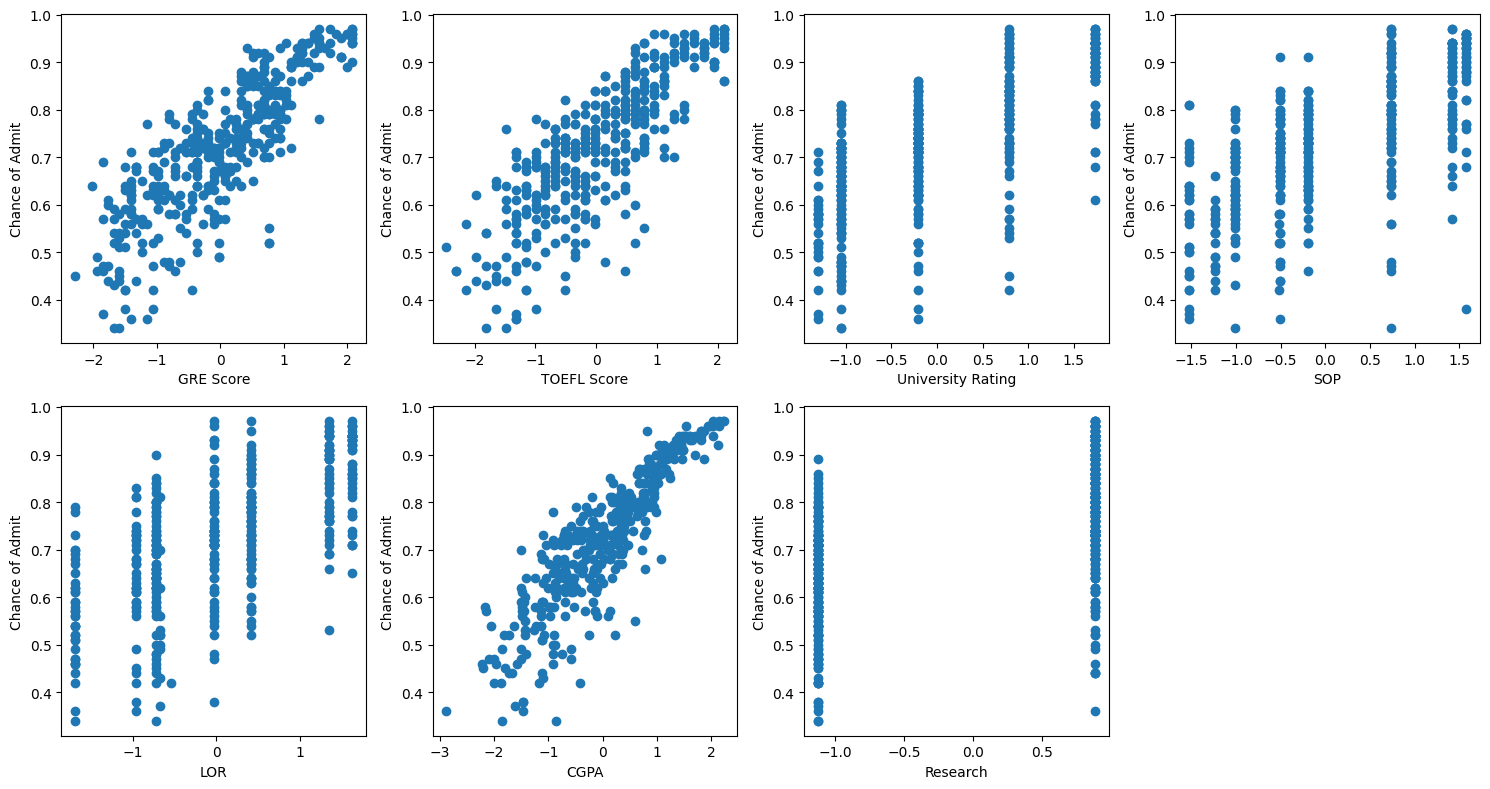

In [ ]:
plt.figure(figsize=(15, 8))
j=1
for i in Xtrain.columns:
  plt.subplot(2, 4, j)
  plt.scatter(Xtrain[i], ytrain)
  plt.xlabel(i)
  plt.ylabel("Chance of Admit")
  j+=1
plt.tight_layout()
plt.show()

### Homoskedasticity

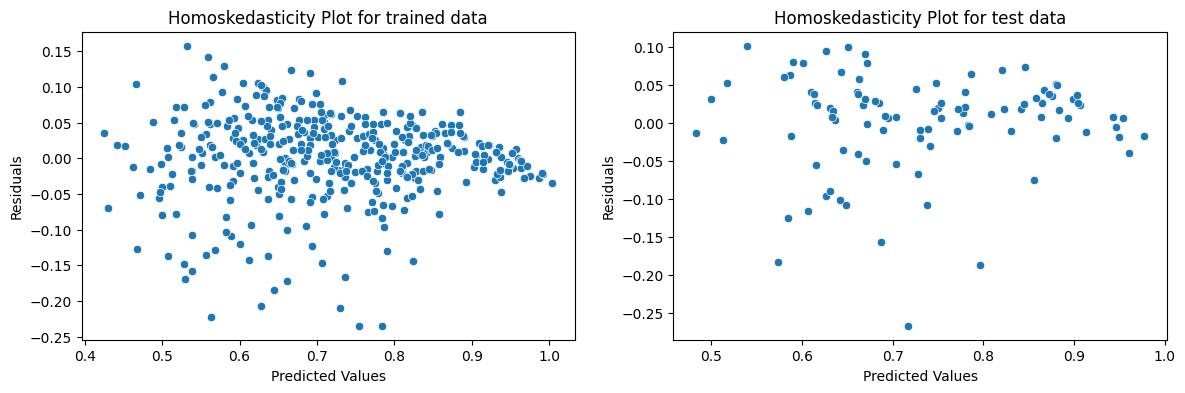

In [ ]:
# checking homoskedasticity using scatterplot
plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
sns.scatterplot(x=y_pred_train,y=residual_train)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoskedasticity Plot for trained data')

plt.subplot(1,2,2)
sns.scatterplot(x=y_pred,y=residual)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoskedasticity Plot for test data')

plt.show()

### Goldfeld Quant Test

Lets check the homoskedasticity with Goldfeld quant test as not able to infer much from the scatterplot.

In [ ]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(ytrain, X_train)
lzip(name, test)

[('F statistic', np.float64(0.9676614801983595)),
 ('p-value', np.float64(0.589962728491335))]

Null Hypothesis for Goldfeld quandt test is no heteroskedasticity in the residuals.

Here p value is 0.62 which is quite high than alpha(0.05).

We are failing to reject the null hypothesis which concludes the residuals are not heteroskedastic. Hence, the residuals are homeskedastic.

### Normality of Residuals

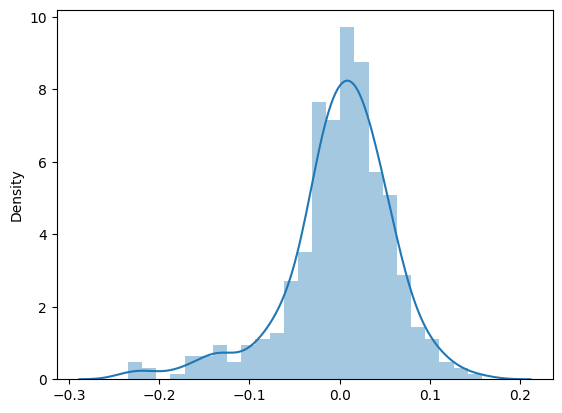

In [ ]:
# checking normality of residuals using distribution plot

sns.distplot(residual_train)
plt.show()

From distribution plot, we can see the errors are a bit left skewed but rest it follows normality.

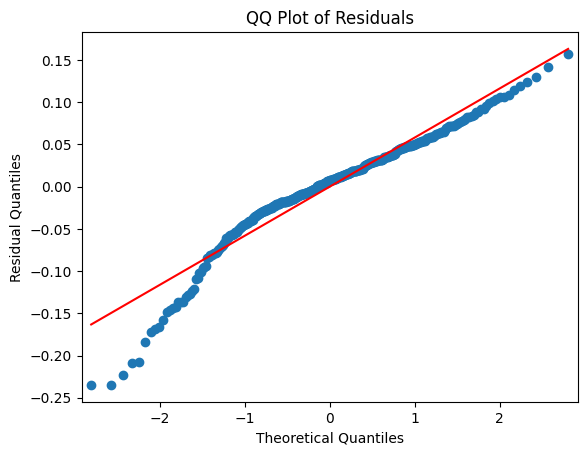

In [ ]:
# QQ-Plot of residuals to check normality

sm.qqplot(residual_train, line='r')
plt.title('QQ Plot of Residuals')
plt.ylabel('Residual Quantiles')
plt.show()

In [ ]:
# Checking normality using SHAPIRO WILK test

from scipy.stats import shapiro
res,pvalue = shapiro(residual_train)
print(f"Pvalue is :{pvalue}")

Pvalue is :8.464193550579159e-12


Shapiro test's pvalue is less than 0.05(assumed alpha so we can reject null hypothesis that it is normally distributed, but as we all know shapiro test is very stringent which wont show normality even for a single deviation, so we assume that distribution is normal.

Text(0, 0.5, 'y_pred')

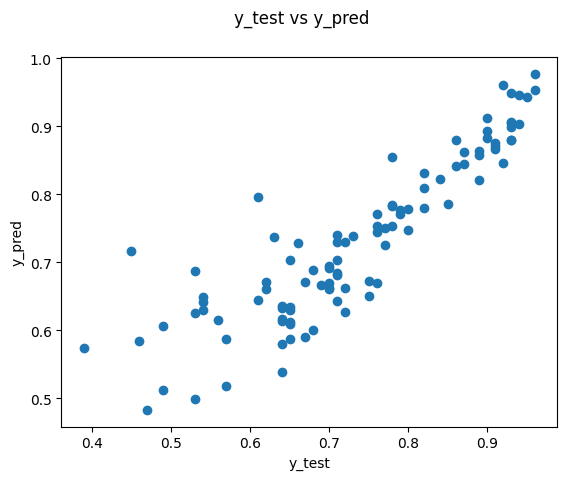

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(ytest, y_pred)
fig.suptitle('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')

Findings from Asssumptions:
- Though we had removed SOP and University Ranking features, we also checked VIF of all just to see if multicollinearity exists between them.
- The VIF score of all the features are less than 5 and it is highest for CGPA which was most significant feature in our linear regression model. So, we are just continuing with all the features.
- Mean of residuals is also close to zero. So, data satisfying this assumption too.
- All the features are more or less positively correlated with the dependent variable `Chance of Admit` and this relation is linear.
- Dataset passed the homoskedasticity  and normality of residuals assumption too.

### Performing Linear Regression using sklearn library

In [ ]:
# Using sklearn to implement linear regression model

model=LinearRegression()
model.fit(Xtrain, ytrain)

model.score(Xtrain, ytrain), model.score(Xtest, ytest)

(0.8260781294595816, 0.7937958750840358)

In [ ]:
# Using sklearn to implement Lasso model

model=Lasso(alpha=0.0001)
model.fit(Xtrain, ytrain)

model.score(Xtrain, ytrain), model.score(Xtest, ytest)

(0.8260772885406213, 0.7937346664427681)

In [ ]:
# Using sklearn to implement Lasso model

model=Ridge(alpha=0.0001)
model.fit(Xtrain, ytrain)

model.score(Xtrain, ytrain), model.score(Xtest, ytest)

(0.8260781294595387, 0.7937958536837058)

In [ ]:
# using ElasticNet regularisation

model_elas=ElasticNet(alpha=0.0001,l1_ratio=0.8)
model_elas.fit(Xtrain,ytrain)
model_elas.score(Xtrain,ytrain),model_elas.score(Xtest,ytest)

(0.8260775935792676, 0.793744476706181)

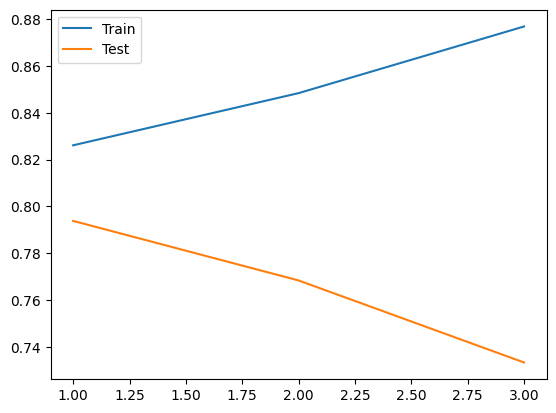

In [ ]:
# Finding the best degree for polynomial features

train_score=[]
test_score=[]

for deg in range(1, 4, 1):
  poly_model=make_pipeline(PolynomialFeatures(degree=deg), StandardScaler(), LinearRegression())
  poly_model.fit(Xtrain, ytrain)

  train_score.append(poly_model.score(Xtrain, ytrain))
  test_score.append(poly_model.score(Xtest, ytest))


plt.plot(list(range(1, 4)), train_score, label='Train')
plt.plot(list(range(1, 4)), test_score, label='Test')

plt.legend()
plt.show()

The best degree for our odel is 1 only so no polynomial fearures helping in increasing the score

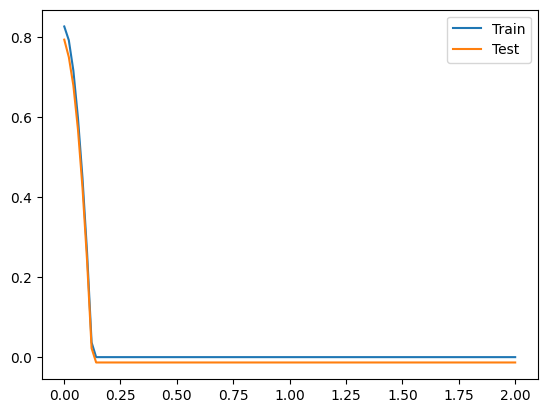

In [ ]:
# Finding best alpha for Lasso Regularisation Model

train_score=[]
test_score=[]

rate_list=np.linspace(0.001, 2, 100)

for i in rate_list:
  poly_model=make_pipeline(StandardScaler(), Lasso(alpha=i))
  poly_model.fit(Xtrain, ytrain)

  train_score.append(poly_model.score(Xtrain, ytrain))
  test_score.append(poly_model.score(Xtest, ytest))

plt.plot(rate_list, train_score, label='Train')
plt.plot(rate_list, test_score, label='Test')

plt.legend()
plt.show()


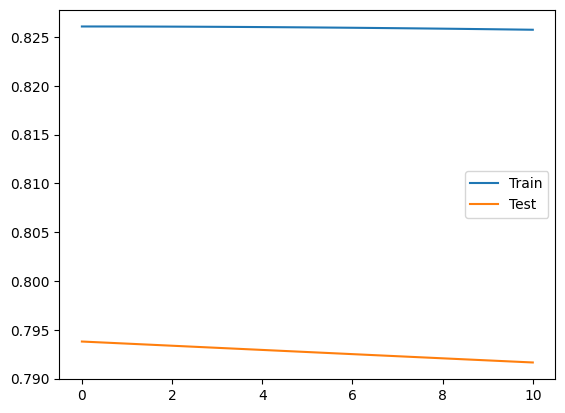

In [ ]:
# Finding best alpha for Ridge Regularisation Model

train_score=[]
test_score=[]

rate_list=np.linspace(0.001, 10, 100)

for i in rate_list:
  poly_model=make_pipeline(StandardScaler(), Ridge(alpha=i))
  poly_model.fit(Xtrain, ytrain)

  train_score.append(poly_model.score(Xtrain, ytrain))
  test_score.append(poly_model.score(Xtest, ytest))

plt.plot(rate_list, train_score, label='Train')
plt.plot(rate_list, test_score, label='Test')

plt.legend()
plt.show()


Implementing different alphas on lasso and ridge regularisation is also not improving our prediction score.

### Feature Importance Summary

In [ ]:
feature_importance=pd.DataFrame()

feature_importance['Features']=Xtrain.columns
feature_importance['Coef']=[model.coef_[i] for i in range(Xtrain.shape[1])]

feature_importance.sort_values(by='Coef', ascending=False)

,Features,Coef
5,CGPA,0.069291
0,GRE Score,0.022151
1,TOEFL Score,0.020890
4,LOR,0.013472
6,Research,0.009794
2,University Rating,0.007916
3,SOP,0.001833


In [ ]:
most_important_feature=Xtrain.columns[np.argmax(model.coef_)]
least_important_feature=Xtrain.columns[np.argmin(model.coef_)]

print(f"Most important feature is {most_important_feature}\nLeast important feature is {least_important_feature}")

Most important feature is CGPA
Least important feature is SOP


###Implementing RFE

In [ ]:
from sklearn.feature_selection import RFE
ln=LinearRegression()

rfe1=RFE(ln, n_features_to_select=5)
rfe1.fit(Xtrain, ytrain)

rfe1.score(Xtrain, ytrain), rfe1.score(Xtest, ytest)

(0.8244021163590886, 0.7913322206394148)

RFE is not improving the model

## Insights and Recommendations

- It is clear from the data that students having high scores(CGPA,GRE,TOEFL) etc are having higher chance of admissions into the IVY colleges more as their chance of admit is strongly and positively correlated with these scores.
- The categorial variables such as University Ranking,Reserach, SOP and LOR also shows positive correlation with chance of admit.
- From Weight coefficients, we can conclude that CGPA and GRE are the most significant predictors and University Rating and SOP are the least important features.
- All the assumptions of Linear regression are quitely satisfied.
- Even after trying polynomial degrees, Lasso, Ridge and ElasticNet Regularisation, the score of test data doesnot goes up from 79 and train data 84%.
- We may need more features like adding publications, internships, work experience, sports quota, extra curricular or co curricular activities etc., and perform featuere engineering to get better predictions from model.
-  Jamboree should encourage students to prioritize improving their CGPA, GRE, TOEFL scores and LOR as these have the strongest correlation with admission chances.
- Given positive correlation of research with admission chances, students should be informed about the importance of having a research background.